<a href="https://colab.research.google.com/github/hudaor/leaf-disease-1/blob/main/Vgg19epochs100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#vgg19
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential



In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG19
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using VGG19 Pre-trained Model
conv_base = VGG19(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
historyg1 = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/vgg191.h5')

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
50/50 [==============================] - 1662s 33s/step - loss: 0.6507 - acc: 0.6190 - val_loss: 0.5816 - val_acc: 0.6970
Epoch 2/30
50/50 [==============================] - 1558s 31s/step - loss: 0.5903 - acc: 0.6860 - val_loss: 0.5226 - val_acc: 0.7730
Epoch 3/30
50/50 [==============================] - 1503s 30s/step - loss: 0.5429 - acc: 0.7150 - val_loss: 0.5391 - val_acc: 0.7180
Epoch 4/30
50/50 [==============================] - 1496s 30s/step - loss: 0.5349 - acc: 0.7300 - val_loss: 0.4674 - val_acc: 0.7820
Epoch 5/30
50/50 [==============================] - 1470s 29s/step - loss: 0.4863 - acc: 0.7600 - val_loss: 0.4431 - val_acc: 0.8010
Epoch 6/30
50/50 [==============================] - 1461s 29s/step - loss: 0.4781 - acc: 0.7834 - val_loss: 0.4339 - val_acc: 0.8130
Epoch 7/30
50/50 [==============================] - 1450s 29s/step - loss: 0.4943 - acc: 0.7590 - val_loss: 0.4140 - val_acc: 0.8080
Epoch 8/30
50/50 [==============================] - 1500s 30s/step - 

In [ ]:
#model3.save('/content/drive/MyDrive/18 04 22/inception3.h5') 
np.save('/content/drive/MyDrive/2022dataset 05 2 22/historyg1', historyg1) 

INFO:tensorflow:Assets written to: ram://6e575429-1b95-48dd-a69f-098ed4991cd4/assets


In [ ]:
#vgg19
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG19
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using VGG19 Pre-trained Model
conv_base = VGG19(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
model2 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/vgg191.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model2.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
historyvg2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/35
20/50 [===========>..................] - ETA: 59s - loss: 0.3689 - acc: 0.8450 

KeyboardInterrupt: ignored

In [ ]:
model2.save('/content/drive/MyDrive/2022dataset 05 2 22/vgg192.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/historyvg2', historyvg2) 

INFO:tensorflow:Assets written to: ram://5aede072-d2c6-4758-89ee-9810288d1565/assets


In [ ]:
#vgg19
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG19
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using VGG19 Pre-trained Model
conv_base = VGG19(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
model3 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/vgg192.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model3.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
historyvg3 = model3.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
50/50 [==============================] - 653s 13s/step - loss: 0.3089 - acc: 0.8590 - val_loss: 0.3870 - val_acc: 0.8253
Epoch 2/15
50/50 [==============================] - 646s 13s/step - loss: 0.3135 - acc: 0.8520 - val_loss: 0.3471 - val_acc: 0.8491
Epoch 3/15
50/50 [==============================] - 644s 13s/step - loss: 0.2912 - acc: 0.8740 - val_loss: 0.2769 - val_acc: 0.8816
Epoch 4/15
50/50 [==============================] - 655s 13s/step - loss: 0.3211 - acc: 0.8610 - val_loss: 0.3072 - val_acc: 0.8650
Epoch 5/15
50/50 [==============================] - 642s 13s/step - loss: 0.3128 - acc: 0.8630 - val_loss: 0.3334 - val_acc: 0.8541
Epoch 6/15
50/50 [==============================] - 640s 13s/step - loss: 0.2947 - acc: 0.8760 - val_loss: 0.2722 - val_acc: 0.8776
Epoch 7/15
50/50 [==============================] - 642s 13s/step - loss: 0.2888 - acc: 0.8660 - val_loss: 0.2890 - val_acc: 0.8765
Epoch 8/15
50/50 [==============================] - 647s 13s/step - loss: 0.

In [ ]:
model3.save('/content/drive/MyDrive/2022dataset 05 2 22/vgg193.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/historyvg3', historyvg3) 

INFO:tensorflow:Assets written to: ram://c6c8b44f-e88e-4200-81c1-0fac1a306c08/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pyyaml h5py

Mounted at /content/drive


In [ ]:
#vgg19
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG19
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using VGG19 Pre-trained Model
conv_base = VGG19(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
model4 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/vgg193.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model4.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
historyvg4 = model4.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
50/50 [==============================] - 3297s 67s/step - loss: 0.3321 - acc: 0.8490 - val_loss: 0.2770 - val_acc: 0.8814
Epoch 2/20
50/50 [==============================] - 906s 18s/step - loss: 0.3159 - acc: 0.8590 - val_loss: 0.3231 - val_acc: 0.8600
Epoch 3/20
50/50 [==============================] - 879s 18s/step - loss: 0.3003 - acc: 0.8610 - val_loss: 0.3140 - val_acc: 0.8648
Epoch 4/20
50/50 [==============================] - 883s 18s/step - loss: 0.2791 - acc: 0.8800 - val_loss: 0.2923 - val_acc: 0.8736
Epoch 5/20
50/50 [==============================] - 872s 18s/step - loss: 0.3050 - acc: 0.8730 - val_loss: 0.2944 - val_acc: 0.8734
Epoch 6/20
50/50 [==============================] - 853s 17s/step - loss: 0.2878 - acc: 0.8710 - val_loss: 0.3406 - val_acc: 0.8551
Epoch 7/20
50/50 [==============================] - 858s 17s/step - loss: 0.3454 - acc: 0.8370 - val_loss: 0.3190 - val_acc: 0.8538
Epoch 8/20
50/50 [==============================] - 831s 17s/step - loss: 0

In [ ]:
model4.save('/content/drive/MyDrive/2022dataset 05 2 22/vgg194.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/historyvg4', historyvg4) 

INFO:tensorflow:Assets written to: ram://4d1d9cf4-cccc-44c8-ae26-0235c9565b60/assets


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


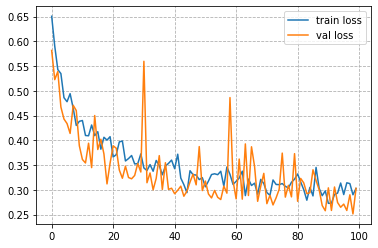

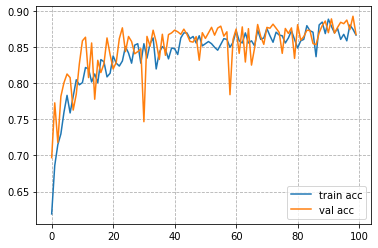

In [ ]:
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
read_r16 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyg1.npy',allow_pickle='TRUE').item()
#read_r17 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv3.npy',allow_pickle='TRUE').item()
read_r18 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyvg2.npy',allow_pickle='TRUE').item()
read_r19 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyvg3.npy',allow_pickle='TRUE').item()
read_r20 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyvg4.npy',allow_pickle='TRUE').item()

#r_total_loss = read_r16.history['loss']+read_r17.history['loss'] + read_r18.history['loss']+  read_r19.history['loss']+read_r20.history['loss']
#r_total_val_loss = read_r16.history['val_loss']+read_r17.history['val_loss'] + read_r18.history['val_loss']+ read_r19.history['val_loss']+read_r20.history['val_loss']
#r_total_accuracy = read_r16.history['acc']+read_r17.history['acc'] + read_r18.history['acc']+ read_r19.history['acc']+read_r20.history['acc']
#r_total_val_accuracy =read_r16.history['val_acc']+ read_r17.history['val_acc'] + read_r18.history['val_acc']+ read_r19.history['val_acc']+read_r20.history['acc']

r_total_loss = read_r16.history['loss'] + read_r18.history['loss']+  read_r19.history['loss']+read_r20.history['loss']
r_total_val_loss = read_r16.history['val_loss'] + read_r18.history['val_loss']+ read_r19.history['val_loss']+read_r20.history['val_loss']

r_total_accuracy = read_r16.history['acc']+ read_r18.history['acc']+ read_r19.history['acc']+read_r20.history['acc']
r_total_val_accuracy =read_r16.history['val_acc'] + read_r18.history['val_acc']+ read_r19.history['val_acc']+read_r20.history['val_acc']



#print(read_r1.history['loss'])
from matplotlib import pyplot
pyplot.grid(linestyle='--')


# plot the loss
plt.plot(r_total_loss,  label='train loss')
plt.plot(r_total_val_loss, label='val loss')
plt.legend()

plt.savefig('LossVal_lossvgg19100epochs.pdf',format='pdf',dpi=800)
plt.show()
# plot the accuracy
plt.plot(r_total_accuracy, label='train acc')
plt.plot(r_total_val_accuracy , label='val acc')
plt.legend()
pyplot.grid(linestyle='--')

plt.savefig('AccVal_accvgg196100epochs.pdf',format='pdf', dpi=800)

In [ ]:
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/vgg194.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Found 8726 images belonging to 2 classes.
Confusion Matrix
[[3428 1006]
 [ 147 4145]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9589    0.7731    0.8560      4434
     Healthy     0.8047    0.9658    0.8779      4292

    accuracy                         0.8679      8726
   macro avg     0.8818    0.8694    0.8670      8726
weighted avg     0.8830    0.8679    0.8668      8726



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
labels = ['Diseased', 'Healthy']
confusion=sns.heatmap(cm ,annot=True, fmt ='g', xticklabels=labels, yticklabels=labels,cmap="viridis")
figure = confusion.get_figure()    
figure.savefig('confusion_VGG19100.pdf', dpi=800)
print(cm)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: ignored

In [ ]:
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/vgg194.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

Found 8726 images belonging to 2 classes.


In [ ]:
#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Confusion Matrix
[[3428 1006]
 [ 147 4145]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9589    0.7731    0.8560      4434
     Healthy     0.8047    0.9658    0.8779      4292

    accuracy                         0.8679      8726
   macro avg     0.8818    0.8694    0.8670      8726
weighted avg     0.8830    0.8679    0.8668      8726



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[3428 1006]
 [ 147 4145]]


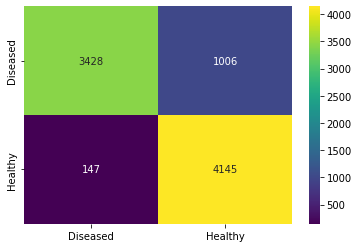

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
labels = ['Diseased', 'Healthy']
confusion=sns.heatmap(cm ,annot=True, fmt ='g', xticklabels=labels, yticklabels=labels,cmap="viridis")
figure = confusion.get_figure()    
figure.savefig('confusion_VGG19100.pdf', dpi=800)
print(cm)

ROC:  0.869433528764638
AUC:  0.869433528764638


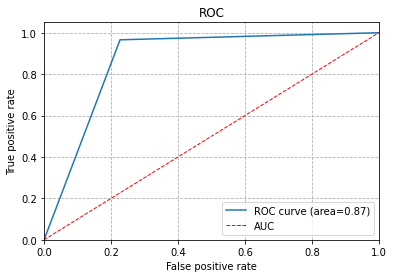

In [ ]:
################--TESTED--#########################
#REFER TO: https://towardsdatascience.com/10-minutes-to-building-a-fully-connected-binary-image-classifier-in-tensorflow-d88062e1247f
# https://colab.research.google.com/drive/1HgaywLtvIJZ8B9F8oWML772CfxL6UB0p?usp=sharing
#ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset17/Test',
#                                                  target_size = (224, 224),
#                                                  batch_size = 16,
#                                                  class_mode = 'categorical',
#                                                   shuffle=False)

# val_set.reset()

# preds = model.predict(val_set, verbose=1)
# preds = np.argmax(preds, axis=1)


#y_proba = model.predict_proba(X_test)
preds = y_pred
fpr, tpr, _ = roc_curve(val_set.classes, preds)
AUC = roc_auc_score(val_set.classes, preds)


roc_auc = auc(fpr, tpr)

print("ROC: ", roc_auc)
print("AUC: ", AUC)

plt.figure()
lw = 1
plt.plot(fpr,tpr,color='#1F77B4', label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--', lw=lw,color='r', label = 'AUC')
#plt.plot(fpr,tpr, color='r',linestyle='--', lw=lw, label='ROC curve (area=%0.2f)' % roc_auc)
#plt.fill(fpr, tpr, color='#1F77B4', label = 'AUC')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
from matplotlib import pyplot
pyplot.grid(linestyle='--')
plt.savefig('roc-aucvgg19100epochs.pdf',format='pdf', dpi=800)
plt.show()